In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel("Alarm Survey Data.xlsx")
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
2,3,18,0.0,light_activity,4.0,1,1 stars
3,4,42,4.0,active,4.0,1,4 stars
4,5,30,1.0,light_activity,1.0,4,3 stars
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5 stars
6429,6363,31,1.0,light,4.0,0,4 stars
6430,6364,26,0.0,lightly active,5.0,0,3 stars
6431,6365,27,1.0,active,5.0,0,3 stars


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survey_id           6433 non-null   int64  
 1   age                 6433 non-null   int64  
 2   number_of_children  6433 non-null   float64
 3   activity_level      6433 non-null   object 
 4   sleep_quality       6082 non-null   float64
 5   number_of_snoozes   6433 non-null   int64  
 6   alarm_rating        6433 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 351.9+ KB


In [4]:
df.sleep_quality.value_counts()

sleep_quality
5.0    2721
4.0    2261
3.0     997
1.0     103
Name: count, dtype: int64

In [5]:
df.sleep_quality.value_counts(dropna=False)

sleep_quality
5.0    2721
4.0    2261
3.0     997
NaN     351
1.0     103
Name: count, dtype: int64

In [6]:
df.isna()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
6428,False,False,False,False,False,False,False
6429,False,False,False,False,False,False,False
6430,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False


In [7]:
df.isna().sum()

survey_id               0
age                     0
number_of_children      0
activity_level          0
sleep_quality         351
number_of_snoozes       0
alarm_rating            0
dtype: int64

In [8]:
df.sleep_quality.fillna(df.sleep_quality.mean(), inplace=True)
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
2,3,18,0.0,light_activity,4.0,1,1 stars
3,4,42,4.0,active,4.0,1,4 stars
4,5,30,1.0,light_activity,1.0,4,3 stars
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5 stars
6429,6363,31,1.0,light,4.0,0,4 stars
6430,6364,26,0.0,lightly active,5.0,0,3 stars
6431,6365,27,1.0,active,5.0,0,3 stars


In [9]:
df[df.isna().any(axis=1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [10]:
df.activity_level = np.where(df.activity_level == 'light_activity', 'lightly active', df.activity_level)

In [11]:
df.activity_level.value_counts()

activity_level
lightly active    2980
active            2450
very active        669
light              334
Name: count, dtype: int64

In [12]:
df.describe()

,survey_id,age,number_of_children,sleep_quality,number_of_snoozes
count,6433.000000,6433.000000,6433.000000,6433.000000,6433.000000
mean,3216.302192,29.069175,1.395616,4.232654,1.145811
std,1856.007409,7.472048,1.432192,0.819139,1.599481
min,1.000000,13.000000,0.000000,1.000000,0.000000
25%,1609.000000,23.000000,0.000000,4.000000,0.000000
50%,3217.000000,28.000000,1.000000,4.000000,0.000000
75%,4825.000000,34.000000,2.000000,5.000000,2.000000
max,6366.000000,47.000000,5.500000,5.000000,19.000000


In [13]:
df[df.duplicated(keep=False)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
6299,6300,31,2.0,active,5.0,0,3 stars
6300,6301,27,2.0,lightly active,4.0,0,2 stars
6301,6302,41,3.0,lightly active,5.0,0,2 stars
6302,6303,25,0.0,lightly active,5.0,0,5 stars
6303,6304,25,1.0,lightly active,5.0,0,2 stars
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5 stars
6429,6363,31,1.0,light,4.0,0,4 stars
6430,6364,26,0.0,lightly active,5.0,0,3 stars
6431,6365,27,1.0,active,5.0,0,3 stars


In [14]:
df[df.duplicated()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
6366,6300,31,2.0,active,5.0,0,3 stars
6367,6301,27,2.0,lightly active,4.0,0,2 stars
6368,6302,41,3.0,lightly active,5.0,0,2 stars
6369,6303,25,0.0,lightly active,5.0,0,5 stars
6370,6304,25,1.0,lightly active,5.0,0,2 stars
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5 stars
6429,6363,31,1.0,light,4.0,0,4 stars
6430,6364,26,0.0,lightly active,5.0,0,3 stars
6431,6365,27,1.0,active,5.0,0,3 stars


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df[df.duplicated()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [17]:
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
2,3,18,0.0,lightly active,4.0,1,1 stars
3,4,42,4.0,active,4.0,1,4 stars
4,5,30,1.0,lightly active,1.0,4,3 stars
...,...,...,...,...,...,...,...
6361,6362,27,2.0,active,5.0,0,5 stars
6362,6363,31,1.0,light,4.0,0,4 stars
6363,6364,26,0.0,lightly active,5.0,0,3 stars
6364,6365,27,1.0,active,5.0,0,3 stars


In [20]:
df.age.max() - df.age.min()

34

<Axes: >

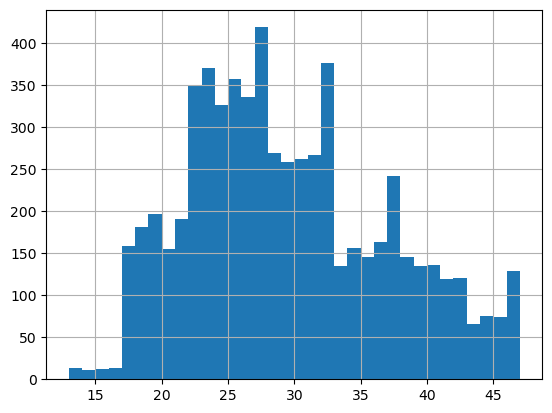

In [21]:
df.age.hist(bins=34)

<Axes: xlabel='activity_level', ylabel='Count'>

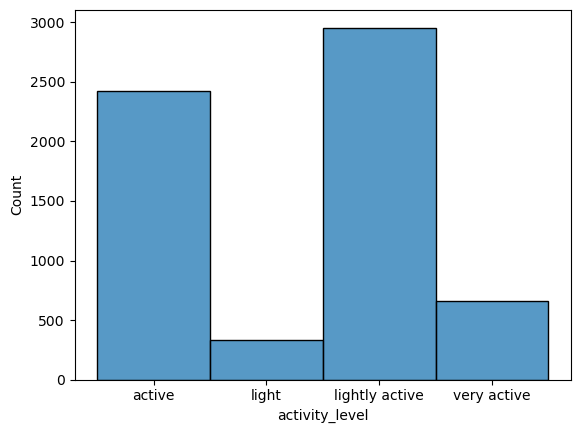

In [22]:
sns.histplot(df.activity_level)

<Axes: >

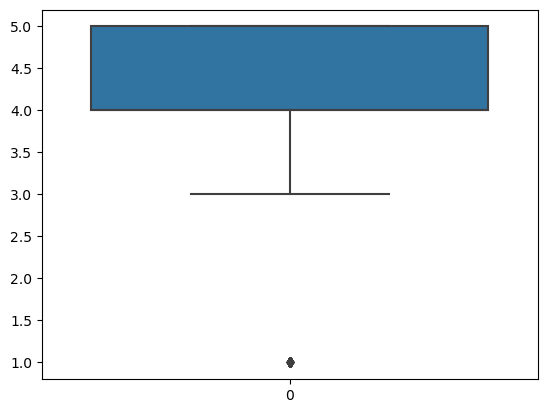

In [23]:
sns.boxplot(df.sleep_quality)

<Axes: >

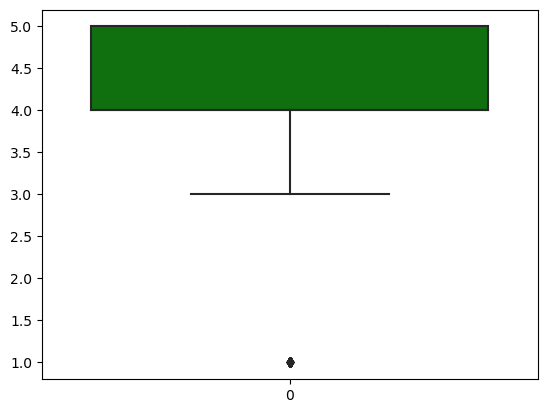

In [25]:
sns.boxplot(df.sleep_quality, color='green')

In [27]:
q25, q50, q75 = np.percentile(df.sleep_quality, [25, 50, 75])
iqr = q75 - q25

# calculate the min and max
min_sleep_quality = q25 - 1.5*iqr
max_sleep_quality = q75 + 1.5*iqr

# show calculations
min_sleep_quality, q25, q50, q75, max_sleep_quality

(2.5, 4.0, 4.0, 5.0, 6.5)

In [28]:
df[df.sleep_quality < 2.5]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
4,5,30,1.0,lightly active,1.0,4,3 stars
6,7,41,5.5,lightly active,1.0,1,2 stars
7,8,36,5.5,lightly active,1.0,1,2 stars
17,18,41,5.5,very active,1.0,1,3 stars
91,92,31,2.0,lightly active,1.0,1,2 stars
...,...,...,...,...,...,...,...
5608,5609,37,4.0,active,1.0,0,3 stars
5981,5982,35,4.0,active,1.0,0,2 stars
6010,6011,22,3.0,lightly active,1.0,0,3 stars
6194,6195,23,1.0,lightly active,1.0,0,4 stars


In [29]:
mean = np.mean(df.sleep_quality)
sd = np.std(df.sleep_quality)

# show mean and standard deviation
mean, sd

(4.229808906511005, 0.8194381363422354)

In [32]:
df.sleep_quality.sort_values()

3234    1.0
5491    1.0
926     1.0
5510    1.0
1335    1.0
       ... 
3177    5.0
4561    5.0
1148    5.0
4554    5.0
3182    5.0
Name: sleep_quality, Length: 6366, dtype: float64

In [33]:
df[df.sleep_quality < 4]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
4,5,30,1.0,lightly active,1.0,4,3 stars
6,7,41,5.5,lightly active,1.0,1,2 stars
7,8,36,5.5,lightly active,1.0,1,2 stars
...,...,...,...,...,...,...,...
6314,6315,35,3.0,lightly active,3.0,0,4 stars
6315,6316,20,1.0,lightly active,3.0,0,1 stars
6317,6318,24,1.0,active,1.0,0,3 stars
6324,6325,41,0.0,active,3.0,0,2 stars


There are no outliers